In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### A Function that simulates the collision
Define a function `collision` that prints out each step of the collision.

In [2]:
def collision(numA, numB, numC, num_iters):
    
    As = ['A']*numA
    Bs = ['B']*numB
    Cs = ['C']*numC
    box = As + Bs + Cs
    
    iters = 1
    print(f'Initially, {len(As)} As, {len(Bs)} Bs, {len(Cs)} Cs')
    while(len(set(box)) > 1 and iters < num_iters):
        l = len(box)
        rng = np.random.default_rng()
        inds = rng.choice(l, 2, replace = False)
        i = inds[0]
        j = inds[1]
        
        if (box[i] == 'A' and box[j] == 'B') or (box[j] == 'A' and box[i] == 'B'):
            As.pop(-1)
            Bs.pop(-1)
            Cs.append('C')
            Cs.append('C')
            print(f"Second {iters}, A collides with B, {len(As)} As, {len(Bs)} Bs, {len(Cs)} Cs ")
           
        
        elif (box[i] == 'A' and box[j] == 'C') or (box[j] == 'A' and box[i] == 'C'):
            As.pop(-1)
            Cs.pop(-1)
            Bs.append('B')
            Bs.append('B')
            print(f"Second {iters}, A collides with C,{len(As)} As, {len(Bs)} Bs, {len(Cs)} Cs ")
            

        elif (box[i] == 'B' and box[j] == 'C') or (box[j] == 'C' and box[i] == 'B'):
            Bs.pop(-1)
            Cs.pop(-1)
            As.append('A')
            As.append('A')
            print(f"Second {iters}, B collides with C, {len(As)} As, {len(Bs)} Bs, {len(Cs)} Cs ")
            
        else:
            print(f'Seecond {iters}, Two {box[i]}s collide,{len(As)} As, {len(Bs)} Bs, {len(Cs)} Cs ')
        
        box = As + Bs + Cs
        iters += 1

collision(1,2, 4, 100)

Initially, 1 As, 2 Bs, 4 Cs
Seecond 1, Two Cs collide,1 As, 2 Bs, 4 Cs 
Seecond 2, Two Cs collide,1 As, 2 Bs, 4 Cs 
Second 3, B collides with C, 3 As, 1 Bs, 3 Cs 
Second 4, A collides with C,2 As, 3 Bs, 2 Cs 
Second 5, A collides with B, 1 As, 2 Bs, 4 Cs 
Seecond 6, Two Cs collide,1 As, 2 Bs, 4 Cs 
Seecond 7, Two Cs collide,1 As, 2 Bs, 4 Cs 
Seecond 8, Two Cs collide,1 As, 2 Bs, 4 Cs 
Second 9, B collides with C, 3 As, 1 Bs, 3 Cs 
Seecond 10, Two Cs collide,3 As, 1 Bs, 3 Cs 
Seecond 11, Two Cs collide,3 As, 1 Bs, 3 Cs 
Second 12, A collides with B, 2 As, 0 Bs, 5 Cs 
Second 13, A collides with C,1 As, 2 Bs, 4 Cs 
Seecond 14, Two Cs collide,1 As, 2 Bs, 4 Cs 
Seecond 15, Two Bs collide,1 As, 2 Bs, 4 Cs 
Second 16, A collides with C,0 As, 4 Bs, 3 Cs 
Seecond 17, Two Bs collide,0 As, 4 Bs, 3 Cs 
Second 18, B collides with C, 2 As, 3 Bs, 2 Cs 
Second 19, A collides with C,1 As, 5 Bs, 1 Cs 
Second 20, A collides with B, 0 As, 4 Bs, 3 Cs 
Second 21, B collides with C, 2 As, 3 Bs, 2 Cs 
Seecond

### Find out all the possible values
Function `allValues` returns all the possible combinations of numbers of A, B, C for given initial values using the mod 3 criterion found in my miniproject.

In [3]:
def allValues(numA, numB, numC):
    values = [(numA, numB, numC)]
    N = numA + numB + numC
    
    
    for x in range(N+1):
        for y in range(N+1):
            for z in range(N+1):
                if x + y + z == N:
                    ab = 0
                    ac = 0
                    bc = 0
                    #print((x, y, z))
                    #print((2*x + y)%3)
                    if ((2*x + y)%3 == (2*numA + numB)%3) and ((2*y + x)%3 == (2*numB + numA)%3):
                        ab = 1
                    if ((2*x + z)%3 == (2*numA + numC)%3) and ((2*z + x)%3 == (2*numC + numA)%3):
                        ac = 1
                    if ((2*y + z)%3 == (2*numB + numC)%3) and ((2*z + y)%3 == (2*numC + numB)%3):
                        bc = 1
                    if ab+ac+bc == 3:
                        values.append((x, y, z))
    
    return list(set(values)), len(set(values))
values, num_values = allValues(1, 2, 4)
print(f'All possible values of xk: {values}')
print(f'The number of possible values is {num_values}.')

All possible values of xk: [(1, 5, 1), (3, 4, 0), (2, 0, 5), (0, 7, 0), (3, 1, 3), (5, 0, 2), (2, 3, 2), (4, 2, 1), (0, 1, 6), (0, 4, 3), (6, 1, 0), (1, 2, 4)]
The number of possible values is 12.


### Check that the values above lies on the plane

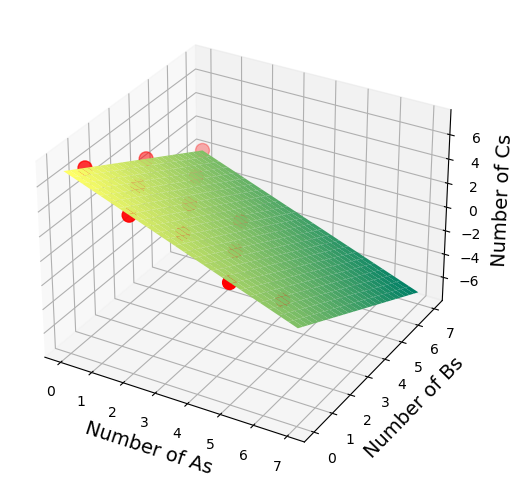

In [5]:
# x grid and y grid defined separately
# Here we use only 51 grid points in each direction
x = np.linspace(0, 7, 51)
y = np.linspace(0, 7, 51)

# meshgrid generates a two-dimensional grid
X, Y = np.meshgrid(x, y)

def plane(x, y):
    return 7 - x - y
# set Z to the function on the grid

Z = plane(X, Y)

x_vals = []
y_vals = []
z_vals = []

for val in values:
    x_vals.append(val[0])
    y_vals.append(val[1])
    z_vals.append(val[2])

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')

# plot the surface
ax.plot_surface(X, Y, Z, cmap = 'summer')
ax.scatter(x_vals, y_vals, z_vals, s = 100, color = 'red')
# label the axes
ax.set_xlabel("Number of As", fontsize=14)
ax.set_ylabel("Number of Bs", fontsize=14)
ax.set_zlabel("Number of Cs", fontsize=14)

plt.show()

### Visualise Each Step of the Collision
Function `collision_result` stores the result after each step of the collisions up to second`N`.

In [6]:
def collision_result(numA, numB, numC, N):
    
    As = ['A']*numA
    Bs = ['B']*numB
    Cs = ['C']*numC
    box = As + Bs + Cs

   
    xks = np.array([numA, numB, numC])
    
    iter = 0
    while iter <= N:
        l = len(box)
        rng = np.random.default_rng()
        inds = rng.choice(l, 2, replace = False)
        i = inds[0]
        j = inds[1]
        

        if (box[i] == 'A' and box[j] == 'B') or (box[j] == 'A' and box[i] == 'B'):
            As.pop(-1)
            Bs.pop(-1)
            Cs.append('C')
            Cs.append('C')
           
        
        elif (box[i] == 'A' and box[j] == 'C') or (box[j] == 'A' and box[i] == 'C'):
            As.pop(-1)
            Cs.pop(-1)
            Bs.append('B')
            Bs.append('B')
            

        elif (box[i] == 'B' and box[j] == 'C') or (box[j] == 'C' and box[i] == 'B'):
            Bs.pop(-1)
            Cs.pop(-1)
            As.append('A')
            As.append('A')
            
       
        xks = np.vstack((xks, np.array([len(As), len(Bs), len(Cs)])))
        
        box = As + Bs + Cs

        iter += 1
    return (len(As), len(Bs), len(Cs)), xks




### Possible Outcomes after 500 seconds for different initial values $[a_0, b_0, c_0]$
$a_0 = 1, 1 \leq b_0 \leq 3,1 \leq c_0 \leq 5$

In [10]:
numA = 1
for numB in range(1, 4):
    for numC in range(1, 6):
        results = []
        for iters in range(100):
            box,_= collision_result(numA, numB, numC, 500)
            results.append(box)
            
        print(f'Initially {numA} As, {numB} Bs, {numC} Cs, possible outcomes after 500s: {set(results)}')


Initially 1 As, 1 Bs, 1 Cs, possible outcomes after 500s: {(3, 0, 0), (0, 3, 0), (0, 0, 3)}
Initially 1 As, 1 Bs, 2 Cs, possible outcomes after 500s: {(0, 0, 4)}
Initially 1 As, 1 Bs, 3 Cs, possible outcomes after 500s: {(0, 0, 5)}
Initially 1 As, 1 Bs, 4 Cs, possible outcomes after 500s: {(0, 6, 0), (0, 0, 6), (6, 0, 0)}
Initially 1 As, 1 Bs, 5 Cs, possible outcomes after 500s: {(2, 2, 3), (0, 0, 7), (0, 3, 4), (0, 6, 1), (2, 5, 0), (1, 4, 2)}
Initially 1 As, 2 Bs, 1 Cs, possible outcomes after 500s: {(0, 4, 0)}
Initially 1 As, 2 Bs, 2 Cs, possible outcomes after 500s: {(0, 1, 4), (0, 4, 1), (1, 2, 2), (5, 0, 0), (2, 0, 3), (2, 3, 0)}
Initially 1 As, 2 Bs, 3 Cs, possible outcomes after 500s: {(1, 2, 3), (5, 0, 1), (1, 5, 0), (2, 0, 4), (4, 2, 0), (3, 1, 2), (0, 1, 5), (2, 3, 1), (0, 4, 2)}
Initially 1 As, 2 Bs, 4 Cs, possible outcomes after 500s: {(1, 5, 1), (2, 0, 5), (0, 7, 0), (3, 1, 3), (2, 3, 2), (4, 2, 1), (0, 1, 6), (0, 4, 3), (1, 2, 4)}
Initially 1 As, 2 Bs, 5 Cs, possible out

### Examples: initial values $[5, 5, 5], [5, 6, 7]$


In [16]:
res1, xk1s = collision_result(5, 5, 5, 5000)
res2, xk2s = collision_result(5, 6, 7, 5000)

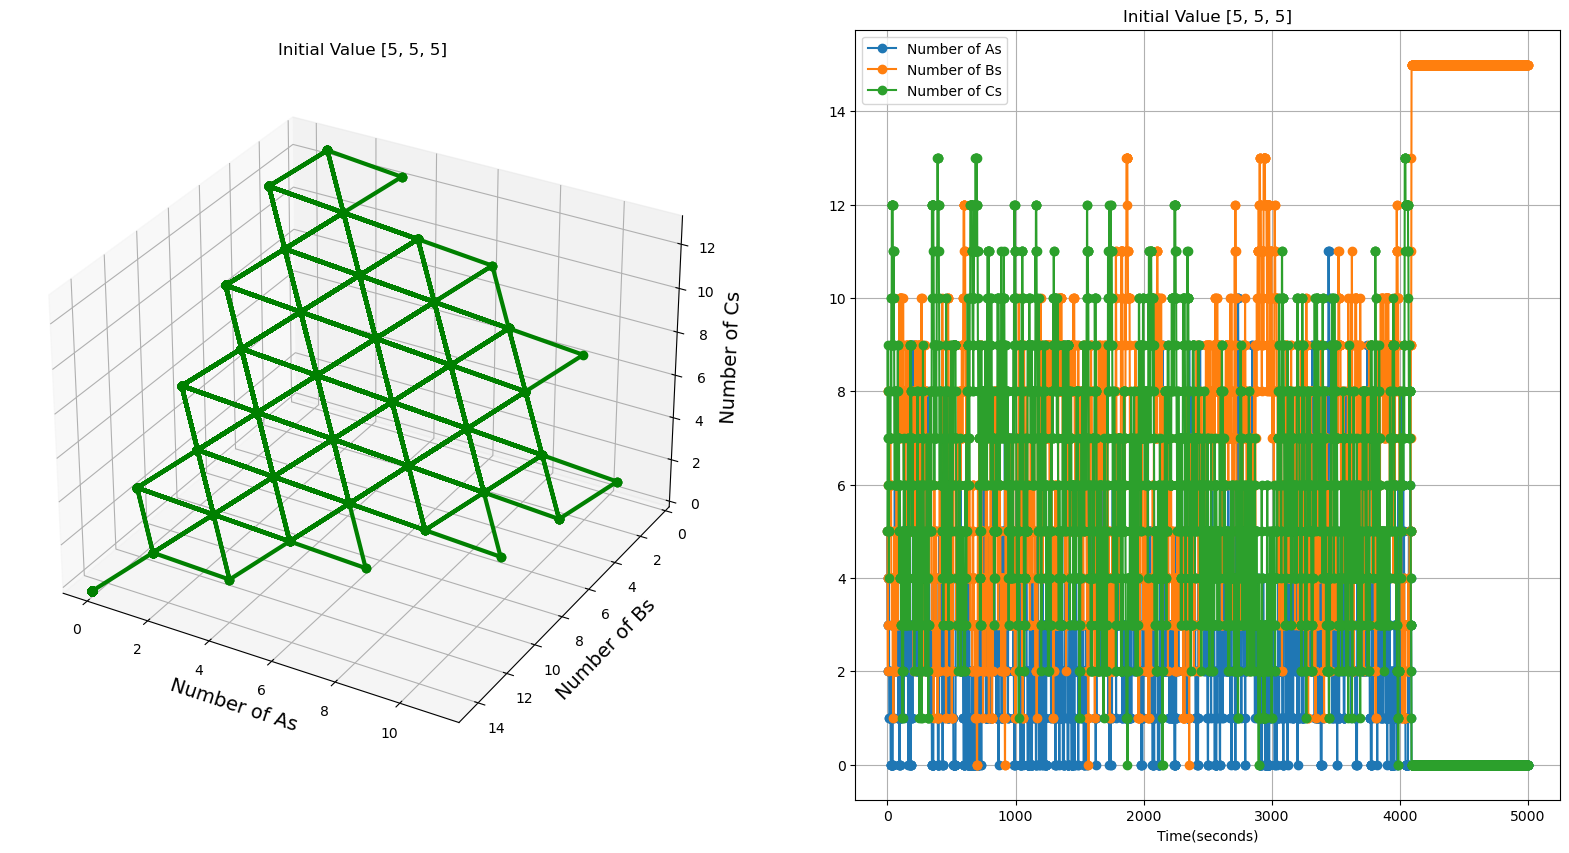

In [77]:
#%matplotlib qt # Un-annotate this to create an iteractive 3D graphs
fig = plt.figure(figsize=(20, 10))
n = len(xk1s[:, 0])
ax1= fig.add_subplot(1, 2, 1, projection='3d')

ax1.plot(xk1s[:, 0],xk1s[:, 1], xk1s[:, 2], lw = 3, marker = 'o', color = 'green')
ax1.set_ylim3d([15, 0])
ax1.set_xlabel("Number of As", fontsize=14)
ax1.set_ylabel("Number of Bs", fontsize=14)
ax1.set_zlabel("Number of Cs", fontsize=14)
ax1.set_title("Initial Value [5, 5, 5]")

ax2 = fig.add_subplot(1, 2, 2)


ax2.plot(np.arange(n), xk1s[:, 0], marker = 'o', label = 'Number of As')
ax2.plot(np.arange(n), xk1s[:, 1], marker = 'o', label = 'Number of Bs')
ax2.plot(np.arange(n), xk1s[:, 2], marker = 'o', label = 'Number of Cs')
ax2.set_xlabel("Time(seconds)")
ax2.set_title("Initial Value [5, 5, 5]")

plt.legend()
plt.savefig("5553d2d.png")
plt.grid(True)

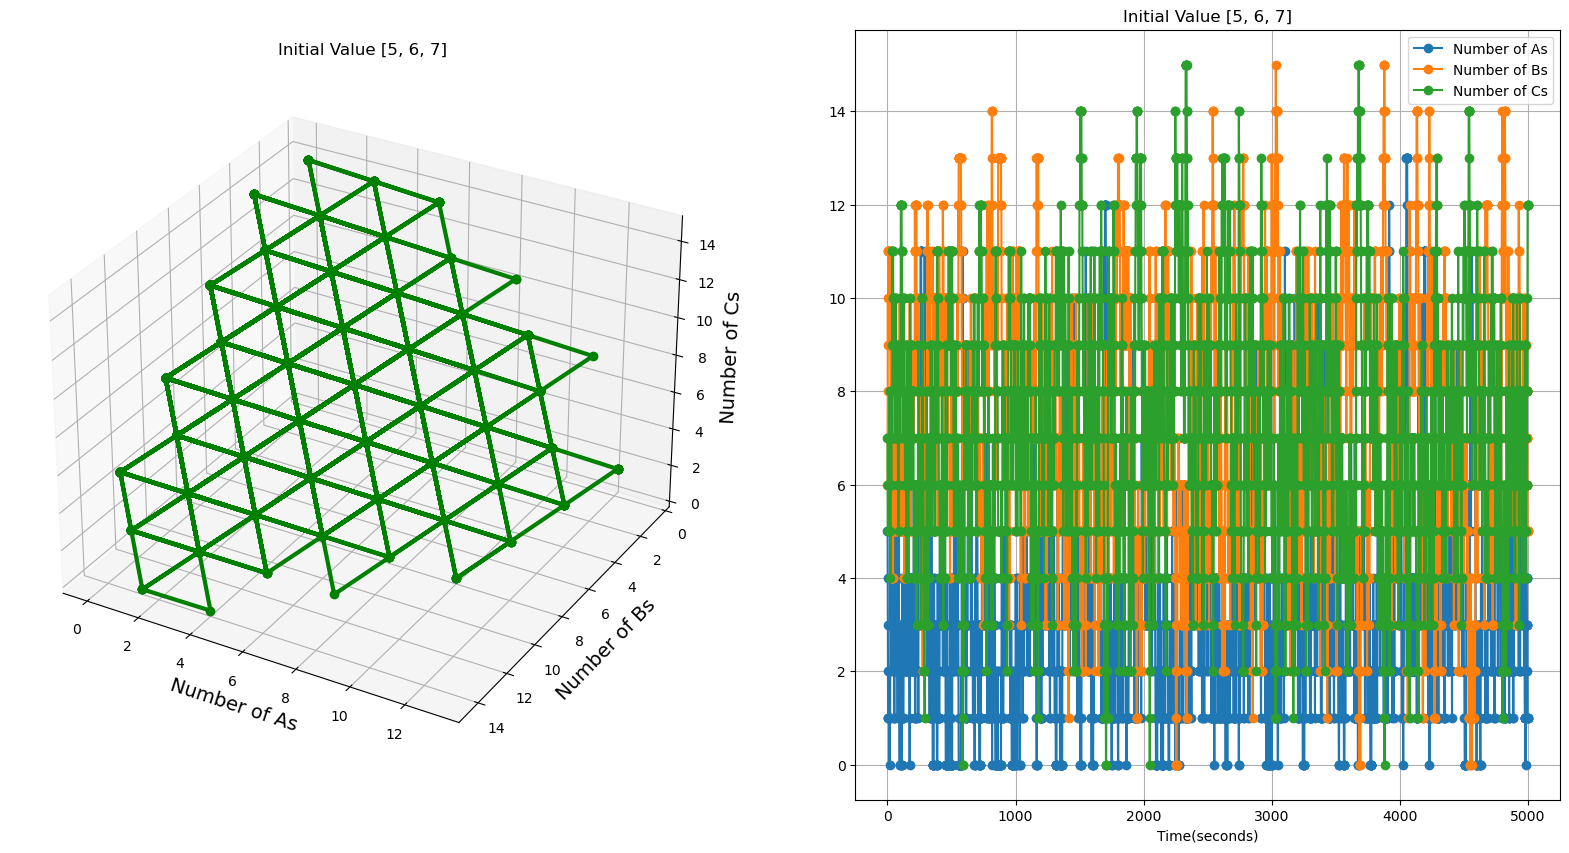

In [78]:
fig = plt.figure(figsize=(20, 10))
ax3= fig.add_subplot(1, 2, 1, projection='3d')

ax3.plot(xk2s[:, 0],xk2s[:, 1], xk2s[:, 2], lw = 3, marker = 'o', color = 'green')
ax3.set_ylim3d([15, 0])
ax3.set_xlabel("Number of As", fontsize=14)
ax3.set_ylabel("Number of Bs", fontsize=14)
ax3.set_zlabel("Number of Cs", fontsize=14)
ax3.set_title("Initial Value [5, 6, 7]")

ax4 = fig.add_subplot(1, 2, 2)


ax4.plot(np.arange(n), xk2s[:, 0], marker = 'o', label = 'Number of As')
ax4.plot(np.arange(n), xk2s[:, 1], marker = 'o', label = 'Number of Bs')
ax4.plot(np.arange(n), xk2s[:, 2], marker = 'o', label = 'Number of Cs')
ax4.set_xlabel("Time(seconds)")
ax4.set_title("Initial Value [5, 6, 7]")
plt.grid(True)
plt.legend()
plt.savefig("5673D2D.png")
plt.show()

### 3D-Animation for initial value $[5, 5, 5]$

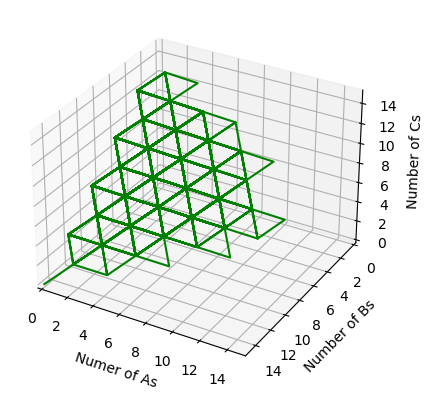

In [76]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def update(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

N = len(xk1s[:, 0])

#xk1s_swap = np.zeros_like(xk1s)
#xk1s_swap[:, 0] = xk1s[:, 1]
#xk1s_swap[:, 1] = xk1s[:, 0]
#xk1s_swap[:, 2] = xk1s[:, 2]
data = xk1s.T
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1], color = 'green')

# Setting the axes properties
ax.set_xlim3d([0, 15])
ax.set_xlabel('Numer of As')

ax.set_ylim3d([15, 0])
ax.set_ylabel('Number of Bs')

ax.set_zlim3d([0, 15])
ax.set_zlabel('Number of Cs')

ani = animation.FuncAnimation(fig, update, frames = N+1, fargs=(data, line), interval=2, blit=False)
#ani.save('555ani.gif', writer='imagemagick')
#plt.show()


writergif = animation.PillowWriter(fps = 500000)

ani.save('555animation.gif',writer=writergif)

plt.show()

In [29]:
print(np.shape(xk1s))

(5002, 3)


### More Examples



In [71]:
n = int(1e5)

res3, xk3s = collision_result(6, 6, 6, n)

In [70]:
res4, xk4s = collision_result(6, 6, 5, n)

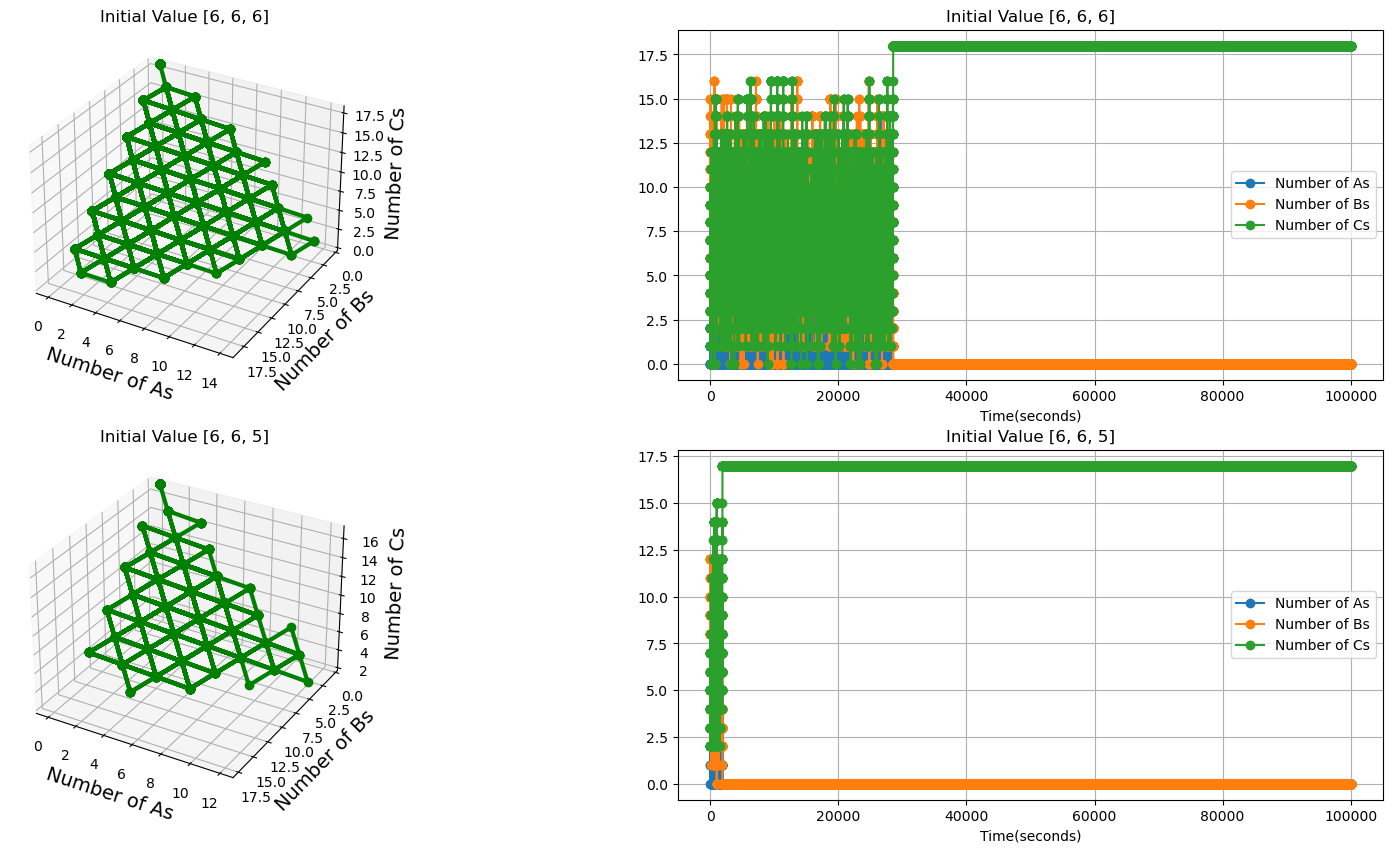

In [79]:
fig = plt.figure(figsize=(20, 10))


ax1= fig.add_subplot(2, 2, 1, projection='3d')
n = len(xk3s[:,0])
ax1.plot(xk3s[:, 0],xk3s[:, 1], xk3s[:, 2], lw = 3, marker = 'o', color = 'green')
ax1.set_ylim3d([19, 0])
ax1.set_xlabel("Number of As", fontsize=14)
ax1.set_ylabel("Number of Bs", fontsize=14)
ax1.set_zlabel("Number of Cs", fontsize=14)
ax1.set_title("Initial Value [6, 6, 6]")

ax2 = fig.add_subplot(2, 2, 2)


ax2.plot(np.arange(n), xk3s[:, 0], marker = 'o', label = 'Number of As')
ax2.plot(np.arange(n), xk3s[:, 1], marker = 'o', label = 'Number of Bs')
ax2.plot(np.arange(n), xk3s[:, 2], marker = 'o', label = 'Number of Cs')
ax2.set_xlabel("Time(seconds)")
ax2.set_title("Initial Value [6, 6, 6]")

plt.legend()
plt.grid(True)

#fig = plt.figure(figsize=(20, 10))
ax3= fig.add_subplot(2, 2, 3, projection='3d')
n = len(xk4s[:,0])
ax3.plot(xk4s[:, 0],xk4s[:, 1], xk4s[:, 2], lw = 3, marker = 'o', color = 'green')
ax3.set_ylim3d([18, 0])
ax3.set_xlabel("Number of As", fontsize=14)
ax3.set_ylabel("Number of Bs", fontsize=14)
ax3.set_zlabel("Number of Cs", fontsize=14)
ax3.set_title("Initial Value [6, 6, 5]")

ax4 = fig.add_subplot(2, 2, 4)


ax4.plot(np.arange(n), xk4s[:, 0], marker = 'o', label = 'Number of As')
ax4.plot(np.arange(n), xk4s[:, 1], marker = 'o', label = 'Number of Bs')
ax4.plot(np.arange(n), xk4s[:, 2], marker = 'o', label = 'Number of Cs')
ax4.set_xlabel("Time(seconds)")
ax4.set_title("Initial Value [6, 6, 5]")
plt.grid(True)
plt.legend()
plt.savefig("6666653D2D.png")
plt.show()

Note: We obtain the rare cases where both system stabilise extremely early.

### Extension: Four Paricles A, B, C, D
Define a function `collision4` to simulate the colllision between four types of particles

In [74]:
def collision4(numA, numB, numC, numD, num_iters):
    
    As = ['A']*numA
    Bs = ['B']*numB
    Cs = ['C']*numC
    Ds = ['D']*numD
    
    box = As + Bs + Cs + Ds
    
    iters = 1
    print(f'Initially, {len(As)} As, {len(Bs)} Bs, {len(Cs)} Cs, {len(Ds)} Ds')
    while(len(set(box)) > 2 and iters < num_iters):
        l = len(box)
        rng = np.random.default_rng()
        
        inds = rng.choice(l, 3, replace = False)
        i = inds[0]
        j = inds[1]
        k = inds[2]
        
        chosen = [box[i], box[j], box[k]]
        chosen = sorted(chosen)
        chosen_str = chosen[0] + chosen[1] + chosen[2]
        
        if chosen_str == 'ABC' :
            As.pop(-1)
            Bs.pop(-1)
            Cs.pop(-1)
            Ds.append('D')
            Ds.append('D')
            Ds.append('D')
            print(f"Second {iters}, A, B, C collide, {len(As)} As, {len(Bs)} Bs, {len(Cs)} Cs, {len(Ds)} Ds")
           
        
        elif chosen_str == 'ABD':
            As.pop(-1)
            Bs.pop(-1)
            Ds.pop(-1)
            Cs.append('C')
            Cs.append('C')
            Cs.append('C')
            print(f"Second {iters}, A, B, D collide, {len(As)} As, {len(Bs)} Bs, {len(Cs)} Cs, {len(Ds)} Ds")
            

        elif chosen_str == 'ACD':
            As.pop(-1)
            Cs.pop(-1)
            Ds.pop(-1)
            Bs.append('B')
            Bs.append('B')
            Bs.append('B')
            print(f"Second {iters}, A, C, D collide, {len(As)} As, {len(Bs)} Bs, {len(Cs)} Cs, {len(Ds)} Ds")
            
        elif chosen_str == 'BCD':
            Bs.pop(-1)
            Cs.pop(-1)
            Ds.pop(-1)
            As.append('A')
            As.append('A')
            As.append('A')
            print(f"Second {iters}, B, C, D collide, {len(As)} As, {len(Bs)} Bs, {len(Cs)} Cs, {len(Ds)} Ds")
            
        else:
            print(f'Second {iters}, three {box[i]}s collide,{len(As)} As, {len(Bs)} Bs, {len(Cs)} Cs, {len(Ds)} Ds')
        
        box = As + Bs + Cs + Ds
        iters += 1

collision4(1,1, 2, 3, 50)

Initially, 1 As, 1 Bs, 2 Cs, 3 Ds
Second 1, three Cs collide,1 As, 1 Bs, 2 Cs, 3 Ds
Second 2, three As collide,1 As, 1 Bs, 2 Cs, 3 Ds
Second 3, three Cs collide,1 As, 1 Bs, 2 Cs, 3 Ds
Second 4, A, C, D collide, 0 As, 4 Bs, 1 Cs, 2 Ds
Second 5, three Bs collide,0 As, 4 Bs, 1 Cs, 2 Ds
Second 6, three Ds collide,0 As, 4 Bs, 1 Cs, 2 Ds
Second 7, three Bs collide,0 As, 4 Bs, 1 Cs, 2 Ds
Second 8, three Bs collide,0 As, 4 Bs, 1 Cs, 2 Ds
Second 9, three Bs collide,0 As, 4 Bs, 1 Cs, 2 Ds
Second 10, three Ds collide,0 As, 4 Bs, 1 Cs, 2 Ds
Second 11, three Bs collide,0 As, 4 Bs, 1 Cs, 2 Ds
Second 12, three Bs collide,0 As, 4 Bs, 1 Cs, 2 Ds
Second 13, three Bs collide,0 As, 4 Bs, 1 Cs, 2 Ds
Second 14, three Bs collide,0 As, 4 Bs, 1 Cs, 2 Ds
Second 15, three Bs collide,0 As, 4 Bs, 1 Cs, 2 Ds
Second 16, three Bs collide,0 As, 4 Bs, 1 Cs, 2 Ds
Second 17, three Bs collide,0 As, 4 Bs, 1 Cs, 2 Ds
Second 18, three Ds collide,0 As, 4 Bs, 1 Cs, 2 Ds
Second 19, B, C, D collide, 3 As, 3 Bs, 0 Cs, 1 Ds
Second